In [1]:
# Install required libraries if not installed
# !pip install xgboost
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the Wine Quality dataset
wine_dataset = pd.read_csv("./winequality_dataset.csv")


In [3]:
# Feature Engineering: Splitting data into features and target variable
X = wine_dataset.drop(columns='quality', axis=1)
y = np.where(wine_dataset['quality'] > 6, 1, 0)  # Binarizing quality: 1 for good quality, 0 for bad quality


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [5]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()


In [6]:
# Define a function to predict wine quality for new data
def predict_quality(model, new_data):
    """
    Predict the quality of wine based on trained model.
    new_data: A 1D array or list containing feature values for a new sample.
    Returns: Predicted quality (Good/Bad)
    """
    prediction = model.predict([new_data])[0]
    return "Good" if prediction == 1 else "Bad"


Decision Tree Metrics:
Accuracy: 0.86, Precision: 0.50, Recall: 0.63, F1 Score: 0.56


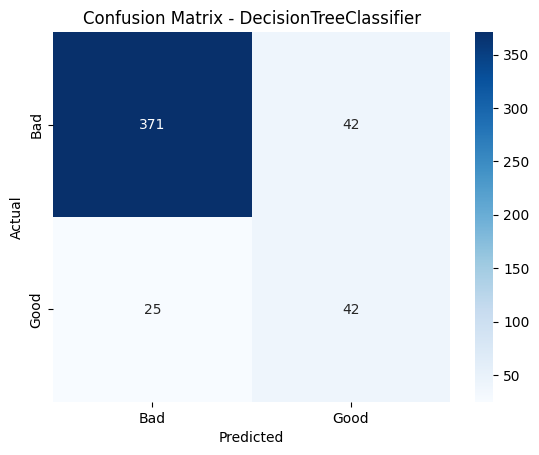

In [7]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
print("\nDecision Tree Metrics:")
evaluate_model(dt_clf, X_test, y_test)


Random Forest Metrics:
Accuracy: 0.89, Precision: 0.65, Recall: 0.52, F1 Score: 0.58


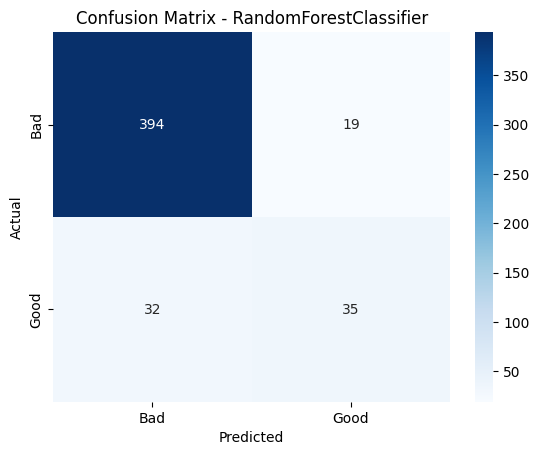

In [8]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print("\nRandom Forest Metrics:")
evaluate_model(rf_clf, X_test, y_test)


Gradient Boosting Metrics:
Accuracy: 0.86, Precision: 0.50, Recall: 0.37, F1 Score: 0.43


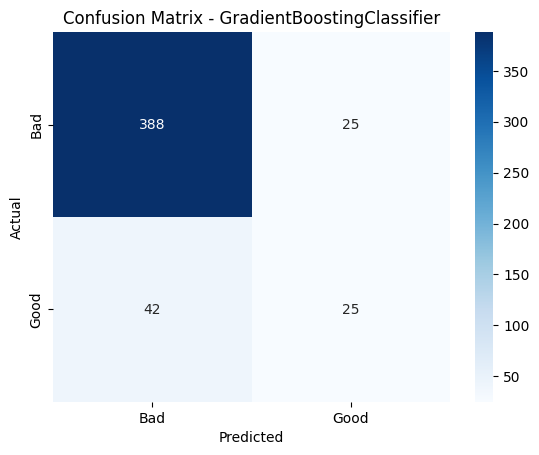

In [9]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
print("\nGradient Boosting Metrics:")
evaluate_model(gb_clf, X_test, y_test)



AdaBoost Metrics:
Accuracy: 0.85, Precision: 0.45, Recall: 0.34, F1 Score: 0.39


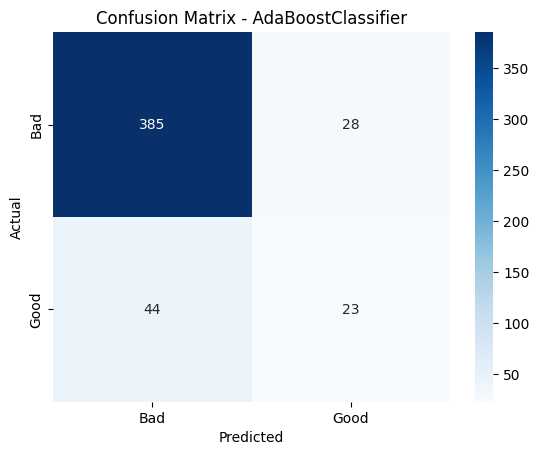

In [10]:
# AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
print("\nAdaBoost Metrics:")
evaluate_model(ada_clf, X_test, y_test)



XGBoost Metrics:
Accuracy: 0.89, Precision: 0.61, Recall: 0.54, F1 Score: 0.57


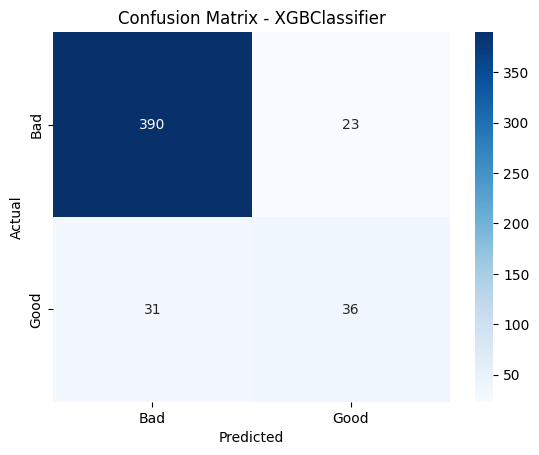

In [11]:
# XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
print("\nXGBoost Metrics:")
evaluate_model(xgb_clf, X_test, y_test)


Example

In [12]:
new_wine_data = [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]


In [13]:
# Predict wine quality using Decision Tree model as an example:
predicted_quality = predict_quality(dt_clf, new_wine_data)
print(f"\nPredicted Quality for the new wine sample (using Decision Tree): {predicted_quality}")
predicted_quality_rf = predict_quality(rf_clf, new_wine_data)
print(f"Predicted Quality for the new wine sample (using Random Forest): {predicted_quality_rf}")
predicted_quality_xgb = predict_quality(xgb_clf, new_wine_data)
print(f"Predicted Quality for the new wine sample (using XGBoost): {predicted_quality_xgb}")



Predicted Quality for the new wine sample (using Decision Tree): Bad
Predicted Quality for the new wine sample (using Random Forest): Bad
Predicted Quality for the new wine sample (using XGBoost): Bad
